In [1]:
import numpy as np
from numpy.fft import fft2, fftshift, ifft2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fft import fft, fftfreq

### section 12: fourier transform
http://www.youtube.com/watch?v=ENrQNiXfaLk

furier transform of step function

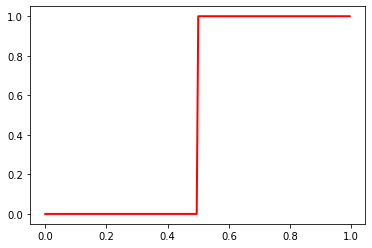

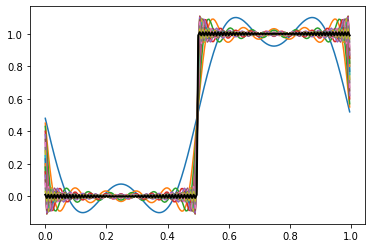

In [10]:
dx = 0.005
L = 1
x = np.arange(0,L , dx)

# step function
f = np.ones(len(x))
f[0:len(x)//2] = 0

# sin function
# f = np.sin(x)
plt.plot(x,f , 'r' , label='f(x)' , linewidth=2)
plt.show()

fFS = np.zeros(len(x))
A0 = (2/(L)) * np.sum(f) * dx* np.ones(len(x))


for m in range(1,100):
    fFS = A0/2
    
    for k in range(1,m):
        AK = (2/(L)) * np.sum(f * np.cos(2 * k * np.pi * x / L)) * dx
        BK = (2/(L)) * np.sum(f * np.sin(2 * k * np.pi * x / L)) * dx
        fFS = fFS + AK * np.cos(2*k*np.pi*x/L) + BK * np.sin(2*k*np.pi*x/L)

    
    if m % 5 == 0:
        plt.plot(x,fFS)
        
plt.plot(x,fFS , color='black' , label='fFS(x)' , linewidth=2)
plt.show()

### Section 16: Discrete Fourier Transform

http://www.youtube.com/watch?v=KTj1YgeN2sY

Example of fourier transform capabilities

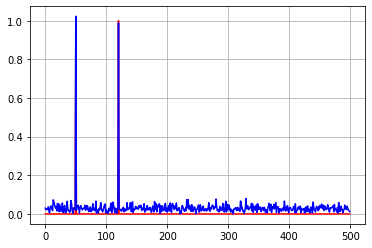

In [11]:
dt = 0.001
t = np.arange(0,1 , dt)
N = len(t)
x = np.linspace(0.0, N*dt, N, endpoint=False)

# original data
y = np.sin(2*np.pi*50*x)+np.sin(2*np.pi*120*x) # w1 = 50 , w2 = 120
# noisy data
y2 = y + 0.5*np.random.randn(N)

yf = fft(y)
yf2 = fft(y2)
xf = fftfreq(N, dt)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), 'r-')
plt.plot(xf, 2.0/N * np.abs(yf2[0:N//2]), 'b-')
plt.grid()
plt.show()

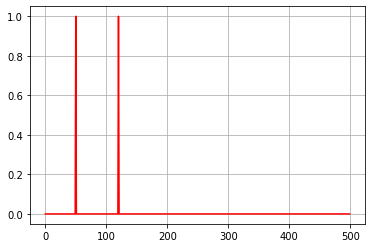

In [12]:
# Filter the noisy data
b = 2.0/N * np.abs(yf2[0:N//2]) > 0.2
plt.plot(xf, b, 'r-')
plt.grid()
plt.show()

# discreet fourier transform

http://www.youtube.com/watch?v=4d6EeRJZLbo

DFT vs FFT

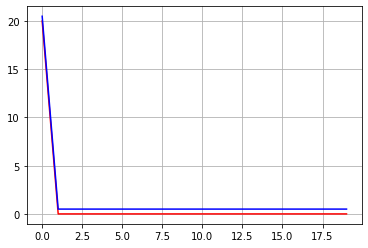

In [13]:
N = 20
# T = 1
# x = np.linspace(0.0, N*T, N)
x = np.ones((N , 1))
yf = fft2(x)

w = np.exp(-1j*2*np.pi/N)
DFT = np.zeros((N,N) , dtype=complex)
# slow version
for i in range(0,N):
    for j in range(0,N):
        DFT[i,j] = w**(i*j)
a = np.dot(DFT,x)
plt.plot(yf.real, 'r-')
# shift the plot for better visualization
plt.plot(a.real+0.5, 'b-')
plt.grid()
plt.show()

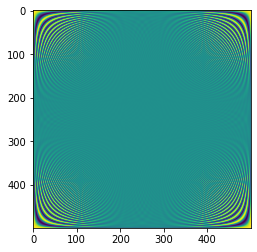

In [20]:
# the frequency visualization
N = 500

I , J = np.meshgrid(np.arange(0,N , 1), np.arange(0,N , 1))
w = np.exp(-1j*2*np.pi/N)
DFT = w**(I*J)

plt.imshow(DFT.real)
plt.show()

## Image compression with DFT (section 18)
http://www.youtube.com/watch?v=R-Qcd-a-DGA

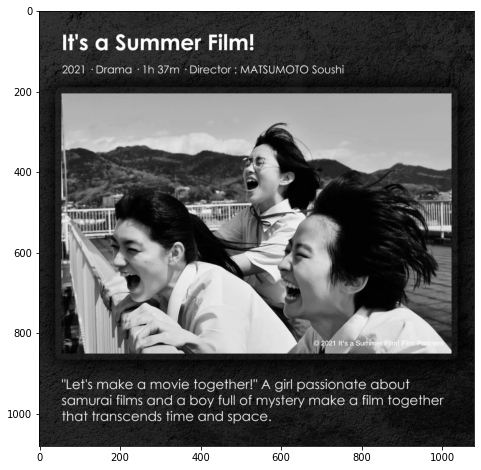

In [2]:
# reading the image
from PIL import Image

# It only works if you clone the repository
with Image.open('pictures/summer.jpg') as I:
    I = I.convert('L')
    A3 = np.asarray(I, dtype = np.float32) 

H,W = np.shape(A3)
hW = int(np.fix(0.5*W))
hH = int(np.fix(0.5*H))
plt.figure(figsize=(8,8))
plt.imshow(A3, cmap = 'gray')

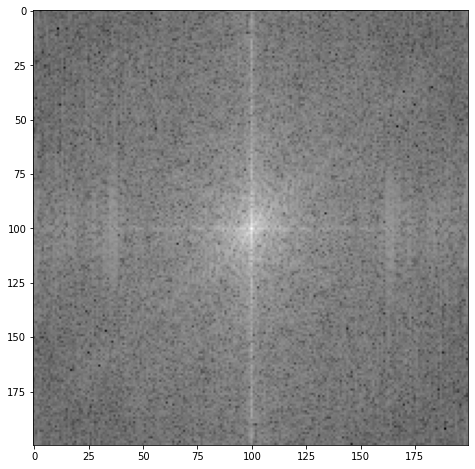

In [16]:
# fft of the image
F3 = fft2(A3)/(W*H)                          
F3 = fftshift(F3)
P3 = np.abs(F3)
r = 100
a = np.log(P3[hH-r:hH+r,hW-r:hW+r])
plt.figure(figsize=(8,8))
plt.imshow(a , cmap = 'gray')

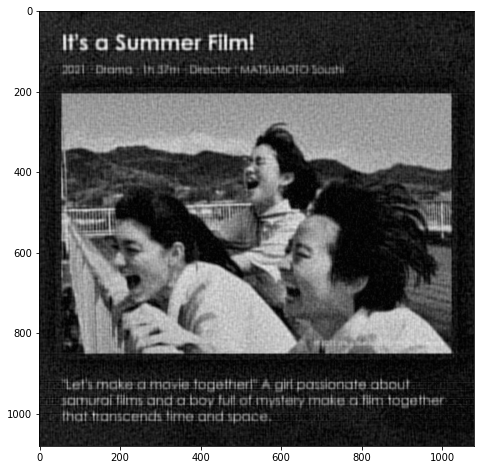

In [17]:
# compression by removing the low frequency
T = 0.1
c = F3 * (P3 >= T)
fM = ifft2(c)*W*H
plt.figure(figsize=(8,8))
plt.imshow(np.abs(fM), cmap = 'gray')

In [18]:
# counting the zero pixels
out1 = np.count_nonzero(F3)
out2 = np.count_nonzero(c)
out1/out2

57.99811048679827

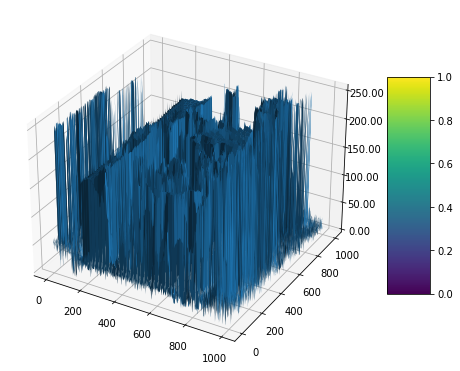

In [19]:
# turning the image to frequency surface
r = 500
A4 = A3[hH-r:hH+r,hW-r:hW+r]
xx, yy = np.mgrid[0:A4.shape[0], 0:A4.shape[1]]

fig, ax = plt.subplots(subplot_kw={"projection": "3d"} , figsize=(8,8))

surf = ax.plot_surface(xx, yy, A4,)
ax.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()